# PLS-DA analysis

## Part 00. Setup 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score


from sys import stdout

In [2]:
# functions of interest
def prediction(X_train, y_train, X_test, y_test, plot_components=False):

    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    if np.max(X.shape[1])+1) > 20:
        
    component = np.arange(1, np.max(X.shape[1])+1) # set max nb of components to nb of variables
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(X_train, y_train)
        # Prediction
        Y_pred = pls.predict(X_test)

        mse_p = mean_squared_error(y_test, Y_pred)
        mse.append(mse_p)

        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)

        plt.show()

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(X_train, y_train)
    Y_pred = pls.predict(X_test) 
    
    # Calculate and print scores
    score_p = r2_score(y_test, Y_pred)
    mse_p = mean_squared_error(y_test, Y_pred)
    sep = np.std(Y_pred[:,0]-y_test)
    rpd = np.std(y_test)/sep
    bias = np.mean(Y_pred[:,0]-y_test)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)

    # Plot regression and figures of merit
    rangey = max(y_test) - min(y_test)
    rangex = max(Y_pred) - min(Y_pred)

    z = np.polyfit(y_test, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, y_test, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y_test, y_test, c='blue', linewidth=1)
        ax.plot(y_test, y_test, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')

        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(y_test)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(y_test)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(y_test)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(y_test)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(y_test)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()    

# Part 01. PLSR tutorial
**Steps:**
1. Simulate a X matrix of 1000 rows and 10 variables.
2. Create a Y response variable that is strongly correlated to the two first variables of X
3. Create a train and test dataset to evaluate the performance of the model.


In [3]:
# PLS regression, with univariate response, a.k.a. PLS1
n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

In [4]:
# creates a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=45)

This functions first runs a loop over the number of PLS components (up to number of variables) and calculate the MSE of prediction.  Second it finds the number of components that minimises the MSE ans uses that value to run PLS again. The second time a whole bunch of metrics is calculated and printed. 

27% completed
Suggested number of components:  3



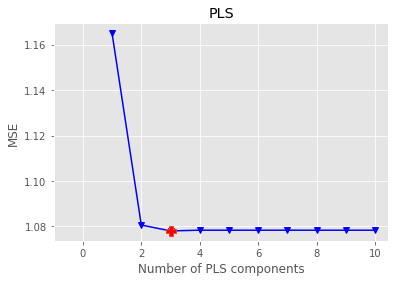

R2: 0.853
MSE: 1.078
SEP: 1.038
RPD: 2.606
Bias: 0.000


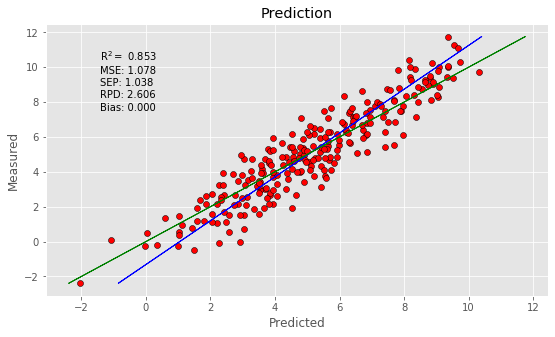

In [25]:
# plot and metrics
prediction(X_train=X_train,
           y_train=y_train,
           X_test=X_test,
           y_test=y_test,
           plot_components=True)

# Volatiles analysis

## Data import and transformation

In [26]:
terpenes = pd.read_csv("pheno_terpenoids.tsv",sep="\t")

In [27]:
terpenes.head()

,sample,wf,thrips,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
0,S lyc MM,non-toxic,non-toxic,0.00000,0.0,0.000,0.0000,88210.77165,0.00000,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,S per LA1278,non-toxic,toxic,234383.78650,0.0,0.000,0.0000,131824.19000,0.00000,800290.02030,...,0.0,0.0,0.0,9153.957334,0.0,0.0,0.0,0.0,0.0,0.0
2,S hua LA1364,non-toxic,non-toxic,0.00000,0.0,104528.752,45335.4665,27304.44693,90430.09761,0.00000,...,0.0,0.0,0.0,5561.180230,0.0,0.0,0.0,0.0,0.0,0.0
3,S che LA1401,non-toxic,toxic,0.00000,0.0,0.000,0.0000,457891.15640,0.00000,32459.72293,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,S pim LA1578,non-toxic,toxic,12809.66965,0.0,0.000,0.0000,221391.28520,0.00000,0.00000,...,0.0,0.0,0.0,9495.496480,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# convert to toxicity to dummy variables
terpenes['wf'] = terpenes['wf'].map({'non-toxic': 0, 'toxic': 1})

In [29]:
terpenes2 = terpenes.copy()
terpenes2['thrips'] = terpenes2['thrips'].map({'non-toxic': 0, 'toxic': 1})

In [33]:
terpenes = terpenes2
terpenes.head()

,sample,wf,thrips,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
0,S lyc MM,0,0,0.00000,0.0,0.000,0.0000,88210.77165,0.00000,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,S per LA1278,0,1,234383.78650,0.0,0.000,0.0000,131824.19000,0.00000,800290.02030,...,0.0,0.0,0.0,9153.957334,0.0,0.0,0.0,0.0,0.0,0.0
2,S hua LA1364,0,0,0.00000,0.0,104528.752,45335.4665,27304.44693,90430.09761,0.00000,...,0.0,0.0,0.0,5561.180230,0.0,0.0,0.0,0.0,0.0,0.0
3,S che LA1401,0,1,0.00000,0.0,0.000,0.0000,457891.15640,0.00000,32459.72293,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,S pim LA1578,0,1,12809.66965,0.0,0.000,0.0000,221391.28520,0.00000,0.00000,...,0.0,0.0,0.0,9495.496480,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# let's create the X and Y matrixes
X = terpenes.iloc[:,3:]
X.head()

,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,10.873_119.0877,11.056_91.0567,11.572_91.0564,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
0,0.00000,0.0,0.000,0.0000,88210.77165,0.00000,0.00000,32617.13711,0.00000,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,234383.78650,0.0,0.000,0.0000,131824.19000,0.00000,800290.02030,0.00000,55971.00761,0.000,...,0.0,0.0,0.0,9153.957334,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,104528.752,45335.4665,27304.44693,90430.09761,0.00000,0.00000,0.00000,624085.817,...,0.0,0.0,0.0,5561.180230,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.000,0.0000,457891.15640,0.00000,32459.72293,0.00000,34284.95912,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,12809.66965,0.0,0.000,0.0000,221391.28520,0.00000,0.00000,24737.81096,0.00000,0.000,...,0.0,0.0,0.0,9495.496480,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# let's get the y univariate responses (one for whiteflies, one for thrips)
y_wf = terpenes["wf"]
y_thrips = terpenes["thrips"]

## PLS terpenes and whiteflies

In [45]:
# creates a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_wf,
                                                    test_size=0.25,
                                                    random_state=45)

117% completed

/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant 

195% completed

/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant 

220% completed
Suggested number of components:  1



/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/mgalland/miniconda3/envs/plsda/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant 

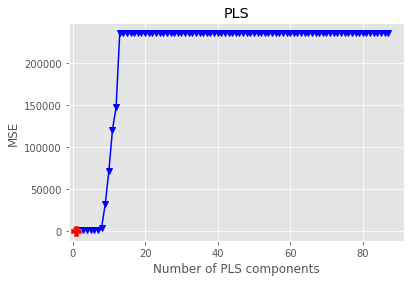

R2: -2771.610
MSE: 665.426
SEP: 23.163
RPD: 0.021
Bias: 11.353


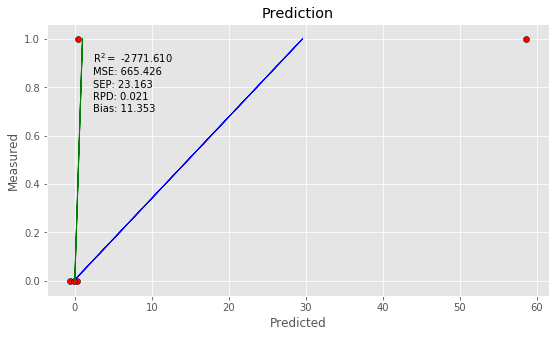

In [46]:
# plot
prediction(X_train=X_train,
           y_train=y_train,
           X_test=X_test,
           y_test=y_test,
           plot_components=True)